<a href="https://colab.research.google.com/github/Shujaat123/Ear_Biometrics/blob/main/Pytorch_Ear_Biometric_with_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Load useful packages
!pip install wget
!pip install py7zr

In [2]:
import py7zr
from zipfile import ZipFile
from random import sample
import PIL.Image as Image
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from os import listdir
from os import path
import h5py
import numpy as np
import wget

In [3]:
# exect defination used in keras
def to_categorical(y, num_classes=None, dtype="float32"):
    """Converts a class vector (integers) to binary class matrix.
    E.g. for use with `categorical_crossentropy`.
    Args:
        y: Array-like with class values to be converted into a matrix
            (integers from 0 to `num_classes - 1`).
        num_classes: Total number of classes. If `None`, this would be inferred
          as `max(y) + 1`.
        dtype: The data type expected by the input. Default: `'float32'`.
    Returns:
        A binary matrix representation of the input as a NumPy array. The class
        axis is placed last.
    Example:
    >>> a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
    >>> print(a)
    [[1. 0. 0. 0.]
     [0. 1. 0. 0.]
     [0. 0. 1. 0.]
     [0. 0. 0. 1.]]
    >>> b = tf.constant([.9, .04, .03, .03,
    ...                  .3, .45, .15, .13,
    ...                  .04, .01, .94, .05,
    ...                  .12, .21, .5, .17],
    ...                 shape=[4, 4])
    >>> loss = tf.keras.backend.categorical_crossentropy(a, b)
    >>> print(np.around(loss, 5))
    [0.10536 0.82807 0.1011  1.77196]
    >>> loss = tf.keras.backend.categorical_crossentropy(a, a)
    >>> print(np.around(loss, 5))
    [0. 0. 0. 0.]
    """
    y = np.array(y, dtype="int")
    input_shape = y.shape

    # Shrink the last dimension if the shape is (..., 1).
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])

    y = y.reshape(-1)
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

In [4]:
# # LOADING IITD Dataset
# data_path = 'https://github.com/Shujaat123/Ear_Biometrics/blob/main/datasets/IITD_Dataset.7z?raw=true'
# filename = 'IITD_Dataset.7z'
# if(path.exists(filename)):
#   !rm $filename
#   print('existing file:', filename, ' has been deleted')
# print('downloading latest version of file:', filename)
# wget.download(data_path, filename)
# print('DONE')

# with py7zr.SevenZipFile('IITD_Dataset.7z', mode='r') as z:
#     z.extractall()
# !ls

# # Processing IITD_dataset
# src_dir = 'ear/processed/221'
# images_name = listdir(src_dir)
# images_name_temp = []
# subjects = []
# for img_ind in range(0,len(images_name)):
#   if(not(images_name[img_ind]=='Thumbs.db')):
#     subjects.append(int(images_name[img_ind].split('_')[0]))
#     images_name_temp.append(images_name[img_ind])

# images_name = images_name_temp
# images_name_ord = []
# subjects_ord = []

# sub_ind = sorted(range(len(subjects)),key=subjects.__getitem__)
# for pos, item in enumerate(sub_ind):
#   images_name_ord.append(images_name[item])
#   subjects_ord.append(subjects[item])

# images_name = images_name_ord
# subjects = subjects_ord

# print(subjects)
# print(images_name)

# img_ind = 0
# ear_images = []
# sub_labels = [];
# target_size = (180, 50)

# for sub_ind in range(0,len(subjects)):
#   img_path = src_dir+'/'+images_name[sub_ind]
#   ear_img = (plt.imread(img_path))/255

#   ear_img = Image.open(img_path)
#   ear_img = ear_img.resize(target_size, Image.ANTIALIAS)
#   ear_img = np.asarray(ear_img).astype(np.float32)/255

#   ear_images.append(ear_img)
#   sub_labels.append(subjects[sub_ind]-1)

# ear_images = np.array(ear_images)
# sub_labels = to_categorical(np.array(sub_labels))

# ear_images = np.expand_dims(ear_images, axis=3)
# # sub_labels = np.expand_dims(sub_labels, axis=2)

# ear_images = np.concatenate((ear_images,ear_images,ear_images), axis=3)

# print(ear_images.shape)
# print(sub_labels.shape)


## Load useful packages
!pip install wget
!pip install py7zr

import keras
import py7zr
from zipfile import ZipFile
from random import sample

import PIL.Image as Image
from scipy import io
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from os import listdir
from os import path
import h5py
import keras.backend as K
import numpy as np
import tensorflow as tf
import wget
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.layers import *
from keras.models import Model
from keras.models import load_model
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix


data_path = 'https://github.com/Alishba18001778/EarClassification/blob/main/IITD_Data_Tensor.mat?raw=true'
Data_filename = 'IITD_Data_Tensor.mat'

data_path_labels = 'https://github.com/Alishba18001778/EarClassification/blob/main/IITD_Labels.mat?raw=true'
labels_filename = 'IITD_Labels.mat'

if(path.exists(labels_filename)):
  !rm $labels_filename
  print('existing file:', labels_filename, ' has been deleted')
print('downloading latest version of file:', labels_filename)
wget.download(data_path_labels, labels_filename)

if(path.exists(Data_filename)):
  !rm $Data_filename
  print('existing file:', Data_filename, ' has been deleted')
print('downloading latest version of file:', Data_filename)
wget.download(data_path, Data_filename)
#
u = io.loadmat('IITD_Data_Tensor.mat')
v = io.loadmat('IITD_Labels.mat')
sub_labels = v["sub_labels"]
sub_labels = np.squeeze(sub_labels.transpose())
ear_images = u["ear_images"]
ear_images = np.array(ear_images)

# sub_labels = to_categorical(np.array(sub_labels))
print(ear_images.shape)
print(sub_labels.shape)

existing file: IITD_Labels.mat  has been deleted
downloading latest version of file: IITD_Labels.mat
existing file: IITD_Data_Tensor.mat  has been deleted
downloading latest version of file: IITD_Data_Tensor.mat
(793, 180, 50)
(793,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(ear_images, sub_labels, test_size=0.382093316519, random_state=42, stratify=sub_labels)
# X_train, X_test, y_train, y_test = train_test_split(ear_images, sub_labels, test_size=0.2786885245901639, random_state=42, stratify=sub_labels)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.386363636363, random_state=42, stratify=y_train)

print('Training dataset:\n',X_train.shape)
print(y_train.shape)
# print('Validation dataset:\n',X_valid.shape)
# print(y_valid.shape)
print('Test dataset:\n',X_test.shape)
print(y_test.shape)

Training dataset:
 (490, 180, 50)
(490,)
Test dataset:
 (303, 180, 50)
(303,)


# Conventional convolution

In [6]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn
import torch.nn.functional
import torch.optim
from torchvision import models #just for debugging



In [7]:
class Pytorch_BUS_Final_Model_C1(torch.nn.Module):
  #  Determine what layers and their order in CNN object
  def __init__(self, num_classes=221, num_filters=8, input_shape=(180,50,1)):
    super(Pytorch_BUS_Final_Model_C1,self).__init__()
    #self.encoder_input = input_shape[-1]
    kernel_size = 3
    # Encoder Layer1
    self.encoder_layer1_name = 'encoder_layer1'
    self.encoder_layer1_conv = torch.nn.Conv2d(1,
                                               num_filters,
                                               kernel_size,
                                               padding='same')

    self.encoder_layer1_activation = torch.nn.ReLU()
    self.encoder_layer1_pooling = torch.nn.MaxPool2d(kernel_size=(2, 2))

    # Encoder Layer2
    self.encoder_layer2_name = 'encoder_layer2'
    self.encoder_layer2_conv = torch.nn.Conv2d(num_filters,
                                               2*num_filters,
                                               kernel_size,
                                               padding='same')
    self.encoder_layer2_activation = torch.nn.ReLU()
    self.encoder_layer2_batch_norm = torch.nn.BatchNorm2d(2*num_filters,
                                                          eps = 1e-3,
                                                          momentum = 0.99)
    self.encoder_layer2_pooling = torch.nn.MaxPool2d(kernel_size=(2, 2))

    # Encoder Layer3
    self.encoder_layer3_name = 'encoder_layer3'
    self.encoder_layer3_conv = torch.nn.Conv2d(2*num_filters,
                                               4*num_filters,
                                               kernel_size,
                                               padding='same')
    self.encoder_layer3_activation = torch.nn.ReLU()
    self.encoder_layer3_pooling = torch.nn.MaxPool2d(kernel_size=(2, 2))

    # Encoder Layer4
    self.encoder_layer4_name = 'encoder_layer4'
    self.encoder_layer4_conv = torch.nn.Conv2d(4*num_filters,
                                               8*num_filters,
                                               kernel_size,
                                               padding='same')
    self.encoder_layer4_activation = torch.nn.ReLU()
    self.encoder_layer4_batch_norm = torch.nn.BatchNorm2d(8*num_filters,
                                                          eps = 1e-3,
                                                          momentum = 0.99)
    self.encoder_layer4_pooling = torch.nn.MaxPool2d(kernel_size=(2, 2))

    # Encoder Layer5
    self.encoder_layer5_name = 'encoder_layer5'
    self.encoder_layer5_conv = torch.nn.Conv2d(8*num_filters,
                                               16*num_filters,
                                               kernel_size,
                                               padding='same')

    self.encoder_layer5_activation = torch.nn.ReLU()
    self.encoder_layer5_pooling = torch.nn.MaxPool2d(kernel_size=(2, 2))

   # Encoder Layer6
    self.encoder_layer6_name = 'encoder_layer2'
    self.encoder_layer6_conv = torch.nn.Conv2d(16*num_filters,
                                               32*num_filters,
                                               kernel_size,
                                               padding='same')
    self.encoder_layer6_activation = torch.nn.ReLU()
    self.encoder_layer6_batch_norm = torch.nn.BatchNorm2d(32*num_filters,
                                                          eps = 1e-3,
                                                          momentum = 0.99)
    # Dense layer
    self.fc1_flatten = torch.nn.Flatten()
    self.fc1_linear = torch.nn.Linear(32*num_filters*(input_shape[0]//(2**5))*(input_shape[1]//(2**5)), num_classes)
    self.fc1_activation = torch.nn.Softmax()

  def forward(self,x):
    # Encoder Layer1
    out = self.encoder_layer1_conv(x)
    out = self.encoder_layer1_activation(out)
    out = self.encoder_layer1_pooling(out)

    # Encoder Layer2
    out = self.encoder_layer2_conv(out)
    out = self.encoder_layer2_activation(out)
    out = self.encoder_layer2_batch_norm(out)
    out = self.encoder_layer2_pooling(out)

    # Encoder Layer3
    out = self.encoder_layer3_conv(out)
    out = self.encoder_layer3_activation(out)
    out = self.encoder_layer3_pooling(out)

    # Encoder Layer4
    out = self.encoder_layer4_conv(out)
    out = self.encoder_layer4_activation(out)
    out = self.encoder_layer4_batch_norm(out)
    out = self.encoder_layer4_pooling(out)

    # Encoder Layer5
    out = self.encoder_layer5_conv(out)
    out = self.encoder_layer5_activation(out)
    out = self.encoder_layer5_pooling(out)

    # Encoder Layer6
    out = self.encoder_layer6_conv(out)
    out = self.encoder_layer6_activation(out)
    out = self.encoder_layer6_batch_norm(out)

    # Dense Layer
    out = self.fc1_flatten(out)
    out = self.fc1_linear(out)
    out = self.fc1_activation(out)

    return out

In [8]:
!pip install torchinfo

In [9]:
from torchinfo import summary
#from torchsummary import summary

pytorch_model_c1 = Pytorch_BUS_Final_Model_C1()
summary(pytorch_model_c1, input_size=(1,1,180,50))

<ipython-input-7-7efb8c9265f2>:111: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.fc1_activation(out)


Layer (type:depth-idx)                   Output Shape              Param #
Pytorch_BUS_Final_Model_C1               [1, 221]                  --
├─Conv2d: 1-1                            [1, 8, 180, 50]           80
├─ReLU: 1-2                              [1, 8, 180, 50]           --
├─MaxPool2d: 1-3                         [1, 8, 90, 25]            --
├─Conv2d: 1-4                            [1, 16, 90, 25]           1,168
├─ReLU: 1-5                              [1, 16, 90, 25]           --
├─BatchNorm2d: 1-6                       [1, 16, 90, 25]           32
├─MaxPool2d: 1-7                         [1, 16, 45, 12]           --
├─Conv2d: 1-8                            [1, 32, 45, 12]           4,640
├─ReLU: 1-9                              [1, 32, 45, 12]           --
├─MaxPool2d: 1-10                        [1, 32, 22, 6]            --
├─Conv2d: 1-11                           [1, 64, 22, 6]            18,496
├─ReLU: 1-12                             [1, 64, 22, 6]            --
├─Bat

In [10]:
# pytorch_model_c1.eval()
# output = pytorch_model_c1(torch.Tensor(X_train[0].reshape(1,180,180,3).transpose(0,3,1,2)))
# print(output.detach().numpy())
# input_x = torch.tensor(X_train[0].reshape(1,180,50,1).transpose(0,3,1,2), device='cuda')
input_x = torch.tensor(X_train[0].reshape(1,1,180,50), device='cuda').float()
print(input_x.shape)
output = pytorch_model_c1(input_x)
print(output.shape)
print(output)

torch.Size([1, 1, 180, 50])
torch.Size([1, 221])
tensor([[0.0056, 0.0039, 0.0052, 0.0062, 0.0101, 0.0069, 0.0033, 0.0071, 0.0050,
         0.0052, 0.0042, 0.0058, 0.0031, 0.0037, 0.0037, 0.0044, 0.0041, 0.0074,
         0.0060, 0.0044, 0.0030, 0.0098, 0.0024, 0.0045, 0.0033, 0.0068, 0.0022,
         0.0061, 0.0037, 0.0038, 0.0050, 0.0036, 0.0053, 0.0018, 0.0033, 0.0067,
         0.0037, 0.0036, 0.0030, 0.0028, 0.0057, 0.0021, 0.0065, 0.0027, 0.0045,
         0.0037, 0.0058, 0.0033, 0.0037, 0.0030, 0.0029, 0.0055, 0.0067, 0.0016,
         0.0077, 0.0064, 0.0028, 0.0050, 0.0057, 0.0053, 0.0057, 0.0046, 0.0045,
         0.0049, 0.0028, 0.0024, 0.0055, 0.0088, 0.0057, 0.0030, 0.0053, 0.0033,
         0.0026, 0.0020, 0.0021, 0.0051, 0.0039, 0.0047, 0.0027, 0.0028, 0.0070,
         0.0057, 0.0021, 0.0038, 0.0063, 0.0058, 0.0035, 0.0019, 0.0039, 0.0048,
         0.0059, 0.0026, 0.0050, 0.0074, 0.0108, 0.0050, 0.0035, 0.0058, 0.0033,
         0.0034, 0.0051, 0.0036, 0.0029, 0.0052, 0.0062, 0.0

<ipython-input-7-7efb8c9265f2>:111: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.fc1_activation(out)


(490, 180, 50) torch.Size([490, 180, 50])


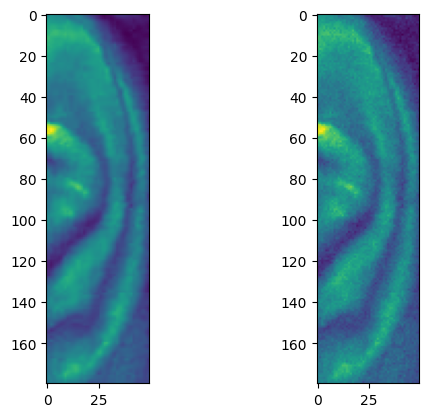

In [11]:
import random
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        if(random.choice([0, 1])):
          return tensor + torch.randn(tensor.size()) * self.std + self.mean
        else:
          return tensor

    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

import torchvision.transforms as T

transform = T.Compose(
    [
        # T.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
        # T.RandomRotation((-5,5)),
          # T.RandomAffine(degrees=(-5, 5), translate=(0, 0.3), scale=(0.5, 1.5)),
        T.RandomVerticalFlip(p=0.25),
        T.RandomHorizontalFlip(p=0.25),
        # T.ElasticTransform(alpha=10.0),
        AddGaussianNoise(0., 0.02)
    ]
)
transformed_X_train = transform(torch.tensor(X_train))
print(X_train.shape, transformed_X_train.shape)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(X_train[0])
plt.subplot(1,2,2)
plt.imshow(transformed_X_train[0])

In [12]:
training_loader = DataLoader(TensorDataset(transform(torch.tensor(X_train)), torch.tensor(y_train)), batch_size=10, pin_memory='True', pin_memory_device='cuda', shuffle=True)
validation_loader = DataLoader(TensorDataset(torch.tensor(X_test), torch.tensor(y_test)), batch_size=1, pin_memory='True', pin_memory_device='cuda')
#loss function
loss_fn = torch.nn.CrossEntropyLoss()
# loss_fn = torch.nn.BCELoss()
# loss_fn = torch.nn.BCEWithLogitsLoss()
# Optimizers specified in the torch.optim package
optimizer = torch.optim.Adam(pytorch_model_c1.parameters())

# # import EarlyStopping
# from pytorchtools import EarlyStopping

In [13]:

def to_categorical(y, num_classes):
    """ 1-hot encodes a tensor """
    return np.eye(num_classes, dtype='uint8')[y]

pytorch_model_c1 = Pytorch_BUS_Final_Model_C1().to(torch.device('cuda'))

# manaul training
def train_one_epoch():
    # training metrics
    train_loss = 0
    train_correct = 0

    # validation metrics
    valid_loss = 0
    valid_correct = 0


    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    pytorch_model_c1.train(True)
    for i, data in enumerate(training_loader,0):
        # Every data instance is an input + label pair
        train_input, train_label = data
        train_input = train_input.unsqueeze(dim=1).float()
        train_label= torch.tensor(to_categorical(y=train_label, num_classes=221)).float()
        # train_label = train_label[:,None]
        if len(train_label.shape)==1:
          train_label = train_label.unsqueeze(dim=0)

        train_input = train_input.to(torch.device('cuda'))
        train_label = train_label.to(torch.device('cuda'))

        # print('train_input:',train_input.shape, 'train_label:',train_label.shape)

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        train_output = pytorch_model_c1(train_input)
        # print('train_input:',train_input.shape, 'train_label:',train_label.shape, 'train_output:',train_output.shape)
        # print('train_label:',train_label)
        # print('train_output:',train_output)

        # Compute the loss and its gradients
        loss = loss_fn(train_output, train_label)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        train_loss += loss.item()
        for batch_count in range(train_output.shape[0]):
          if(torch.argmax(train_output[batch_count,:]) == torch.argmax(train_label[batch_count,:])):
            train_correct += 1

    # print('training epoch complete')
    # Here, we use enumerate(validation_loader) instead of
    # iter(validation_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    pytorch_model_c1.train(False)
    for i, data in enumerate(validation_loader,0):
        # Every data instance is an input + label pair
        valid_input, valid_label = data

        valid_input = valid_input.unsqueeze(dim=1).float()
        valid_label= torch.tensor(to_categorical(y=valid_label, num_classes=221)).float()
        if len(valid_label.shape)==1:
          valid_label = valid_label.unsqueeze(dim=0)

        valid_input = valid_input.to(torch.device('cuda'))
        valid_label = valid_label.to(torch.device('cuda'))

        # Make predictions for this batch
        valid_output = pytorch_model_c1(valid_input)

        # print('valid_input:',valid_input.shape, 'valid_label:',valid_label.shape, 'valid_output:',valid_output.shape)

        # Gather data and report
        valid_loss += loss_fn(valid_output, valid_label).item()
        for batch_count in range(valid_output.shape[0]):
          if(torch.argmax(valid_output[batch_count,:]) == torch.argmax(valid_label[batch_count,:])):
            valid_correct += 1

    print(f"Training: \n Training Accuracy: {100*train_correct/len(training_loader.dataset)}%, Average Training Loss: {train_loss/len(training_loader)} \n")

    print(f"Validation: \n Validation Accuracy: {100*valid_correct/len(validation_loader.dataset)}%, Average Validation Loss: {valid_loss/len(validation_loader)} \n")

    return train_loss, valid_loss


In [14]:
# def early_stopping(train_loss, validation_loss, min_delta, tolerance):

#     counter = 0
#     if (validation_loss - train_loss) > min_delta:
#         counter +=1
#         if counter >= tolerance:
#           return True

# early_stopping = EarlyStopping(patience=10, verbose=True)

# Initializing in a separate cell so we can easily add more epochs to the same run
epoch_number = 0
EPOCHS = 50
optimizer = torch.optim.Adam(pytorch_model_c1.parameters(), lr=1e-4)
for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))
    train_loss, valid_loss = train_one_epoch()
    # if early_stopping.early_stop:
    #     print("Early stopping")
    #     break
    # early stopping
    # if early_stopping(train_loss, valid_loss, min_delta=10, tolerance = 20):
    #   print("We are at epoch:", epoch_number)
    #   break
    epoch_number += 1

EPOCH 1:


<ipython-input-7-7efb8c9265f2>:111: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.fc1_activation(out)


Training: 
 Training Accuracy: 1.2244897959183674%, Average Training Loss: 5.3974960969418895 

Validation: 
 Validation Accuracy: 4.29042904290429%, Average Validation Loss: 5.386059883797523 

EPOCH 2:
Training: 
 Training Accuracy: 4.081632653061225%, Average Training Loss: 5.384984610032062 

Validation: 
 Validation Accuracy: 5.6105610561056105%, Average Validation Loss: 5.368568640730955 

EPOCH 3:
Training: 
 Training Accuracy: 9.183673469387756%, Average Training Loss: 5.365808019832689 

Validation: 
 Validation Accuracy: 6.270627062706271%, Average Validation Loss: 5.362040631448475 

EPOCH 4:
Training: 
 Training Accuracy: 12.040816326530612%, Average Training Loss: 5.3269741875784735 

Validation: 
 Validation Accuracy: 13.531353135313532%, Average Validation Loss: 5.313809564798185 

EPOCH 5:
Training: 
 Training Accuracy: 20.0%, Average Training Loss: 5.277827369923494 

Validation: 
 Validation Accuracy: 19.801980198019802%, Average Validation Loss: 5.27467666443425 

EP